# Coronavirus_Tweets_NLP

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

!pip install textblob
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

Defaulting to user installation because normal site-packages is not writeable
  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [4]:
df_test=pd.read_csv("Corona_NLP_test.csv",encoding='latin-1')

In [5]:
df_train=pd.read_csv("Corona_NLP_train.csv",encoding='latin-1')

In [6]:
df_train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [9]:
df_train.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [10]:
df_train.shape,df_test.shape

((41157, 6), (3798, 6))

<Axes: >

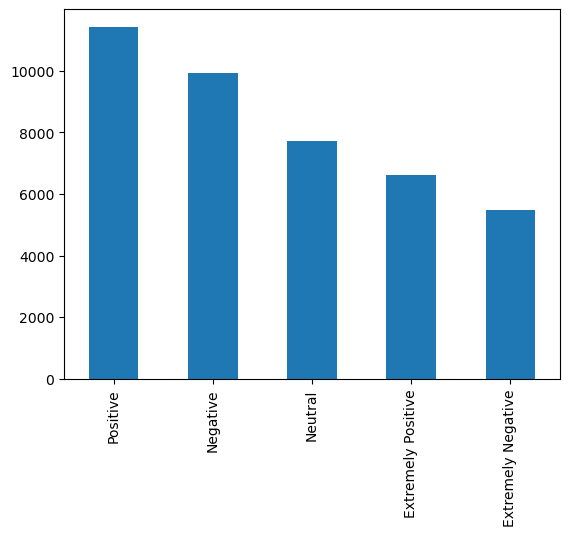

In [11]:
df_train["Sentiment"].value_counts().plot.bar()

<Axes: >

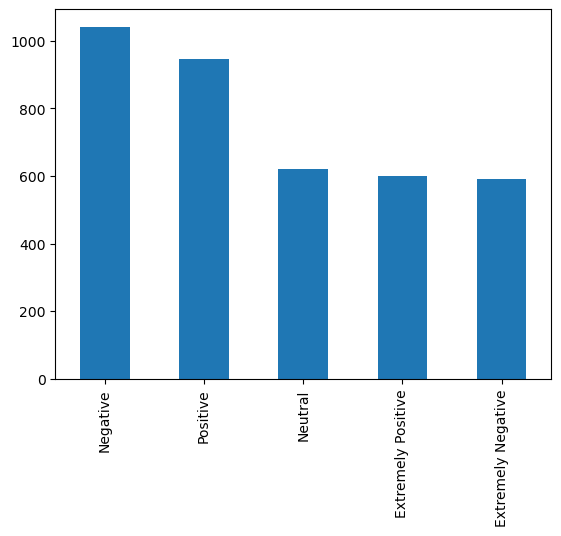

In [12]:
df_test["Sentiment"].value_counts().plot.bar()

In [13]:
df_train["Sentiment"].replace({"Extremely Positive":"Positive","Extremely Negative":"Negative"},inplace=True)
df_test["Sentiment"].replace({"Extremely Positive":"Positive","Extremely Negative":"Negative"},inplace=True)

<Axes: >

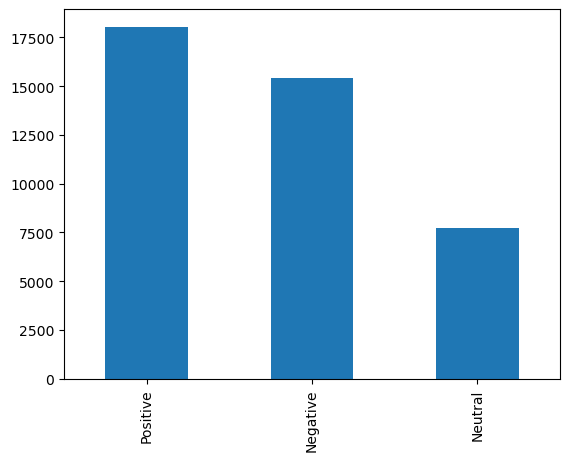

In [14]:
df_train["Sentiment"].value_counts().plot.bar()

In [15]:
df_train["OriginalTweet"]=df_train["OriginalTweet"].str.lower() #küçük harfe çevrildi
df_train["OriginalTweet"]=df_train["OriginalTweet"].str.replace("[^\w\s]","") #noktalama işaretlerini kaldırır
df_train["OriginalTweet"]=df_train["OriginalTweet"].str.replace("\d+","") #d digit rakamları kaldırır
df_train["OriginalTweet"]=df_train["OriginalTweet"].str.replace("\n"," ").replace("\r","") #Satır sonu,\n enter a basılmışsa \

In [16]:
df_test["OriginalTweet"]=df_test["OriginalTweet"].str.lower() #küçük harfe çevrildi
df_test["OriginalTweet"]=df_test["OriginalTweet"].str.replace("[^\w\s]","") #noktalama işaretlerini kaldırır
df_test["OriginalTweet"]=df_test["OriginalTweet"].str.replace("\d+","") #d digit rakamları kaldırır
df_test["OriginalTweet"]=df_test["OriginalTweet"].str.replace("\n"," ").replace("\r","") #Satır sonu,\n enter a basılmışsa \r

In [17]:
df_train["Sentiment"].replace({"Positive":2,"Neutral":1,"Negative":0},inplace=True)
df_test["Sentiment"].replace({"Positive":2,"Neutral":1,"Negative":0},inplace=True)

In [18]:
df_train[["OriginalTweet","Sentiment"]]

,OriginalTweet,Sentiment
0,menyrbie phil_gahan chrisitv httpstcoifzfanpa ...,1
1,advice talk to your neighbours family to excha...,2
2,coronavirus australia woolworths to give elder...,2
3,my food stock is not the only one which is emp...,2
4,me ready to go at supermarket during the covid...,0
...,...,...
41152,airline pilots offering to stock supermarket s...,1
41153,response to complaint not provided citing covi...,0
41154,you know itâs getting tough when kameronwilds ...,2
41155,is it wrong that the smell of hand sanitizer i...,1


In [19]:
df_test[["OriginalTweet","Sentiment"]]

,OriginalTweet,Sentiment
0,trending new yorkers encounter empty supermark...,0
1,when i couldnt find hand sanitizer at fred mey...,2
2,find out how you can protect yourself and love...,2
3,panic buying hits newyork city as anxious shop...,0
4,toiletpaper dunnypaper coronavirus coronavirus...,1
...,...,...
3793,meanwhile in a supermarket in israel people d...,2
3794,did you panic buy a lot of nonperishable items...,0
3795,asst prof of economics cconces was on nbcphila...,1
3796,gov need to do somethings instead of biar je r...,0


In [20]:
vect=CountVectorizer(stop_words="english")
x_train_dtm=vect.fit_transform(df_train["OriginalTweet"],df_train["Sentiment"])
x_test_dtm=vect.transform(df_test["OriginalTweet"])

In [21]:
x_train_dtm.shape,x_test_dtm.shape

((41157, 83085), (3798, 83085))

In [22]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [23]:
L=LogisticRegression()
model=L.fit(x_train_dtm,df_train["Sentiment"])
L_predict=L.predict(x_test_dtm)

In [24]:
accuracy_score(L_predict,df_test["Sentiment"])

0.7812006319115324

In [25]:
m=MultinomialNB()
model=m.fit(x_train_dtm,df_train["Sentiment"])
m_predict=m.predict(x_test_dtm)

In [26]:
accuracy_score(m_predict,df_test["Sentiment"])

0.6635071090047393

In [27]:
from wordcloud import WordCloud

In [34]:
def wc(data,bgcolor):
    from PIL import Image
    mask = np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor, width=800, height=400,mask=mask,max_words=200).generate(' '.join(data))
    plt.figure( figsize=(20,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [29]:
df=pd.concat([df_train,df_test],ignore_index=True).reset_index()

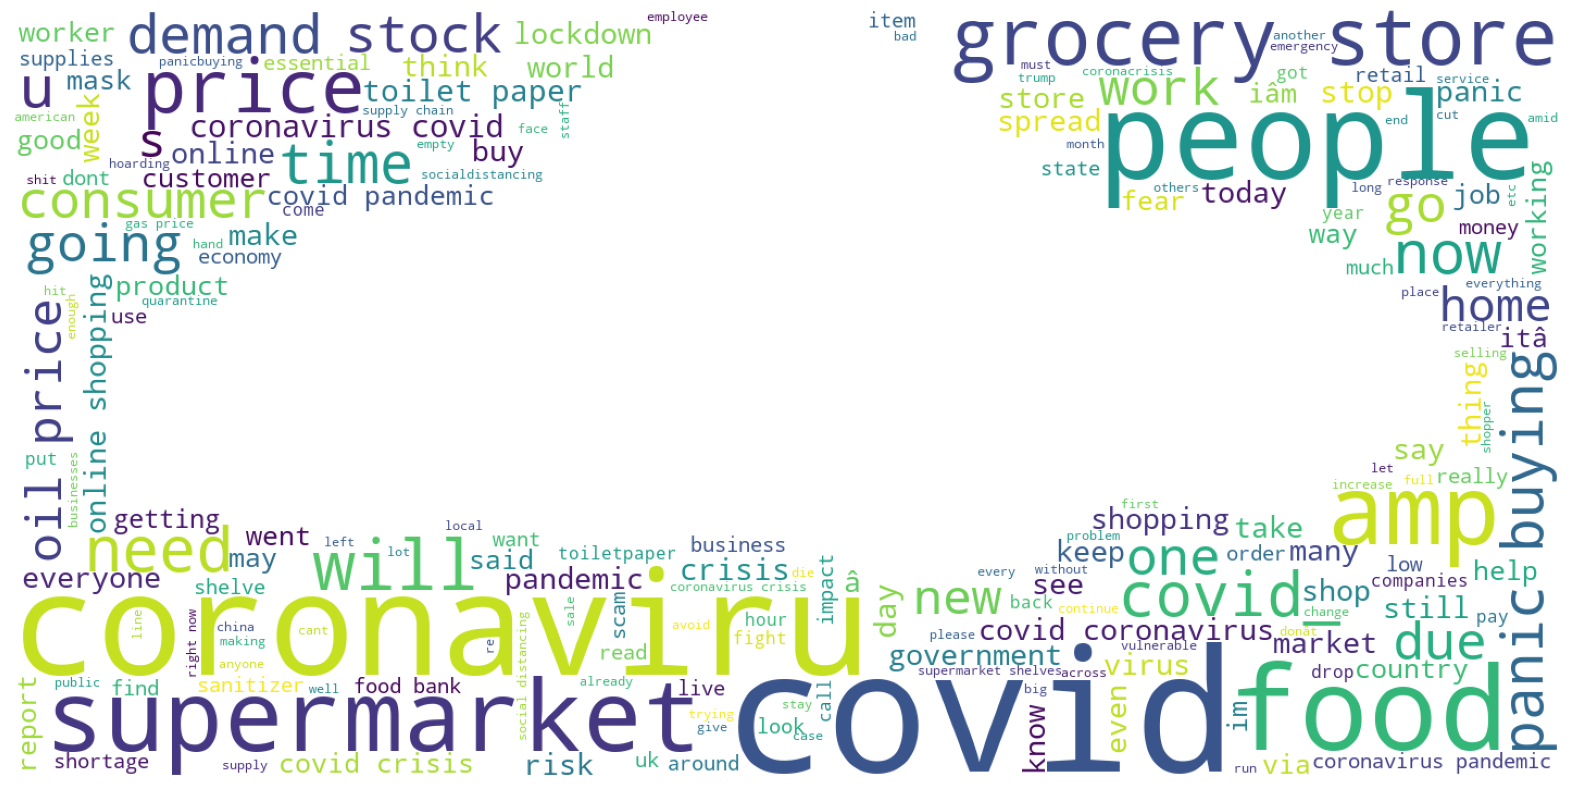

In [35]:
wc(df[df["Sentiment"]==0]["OriginalTweet"],'white')

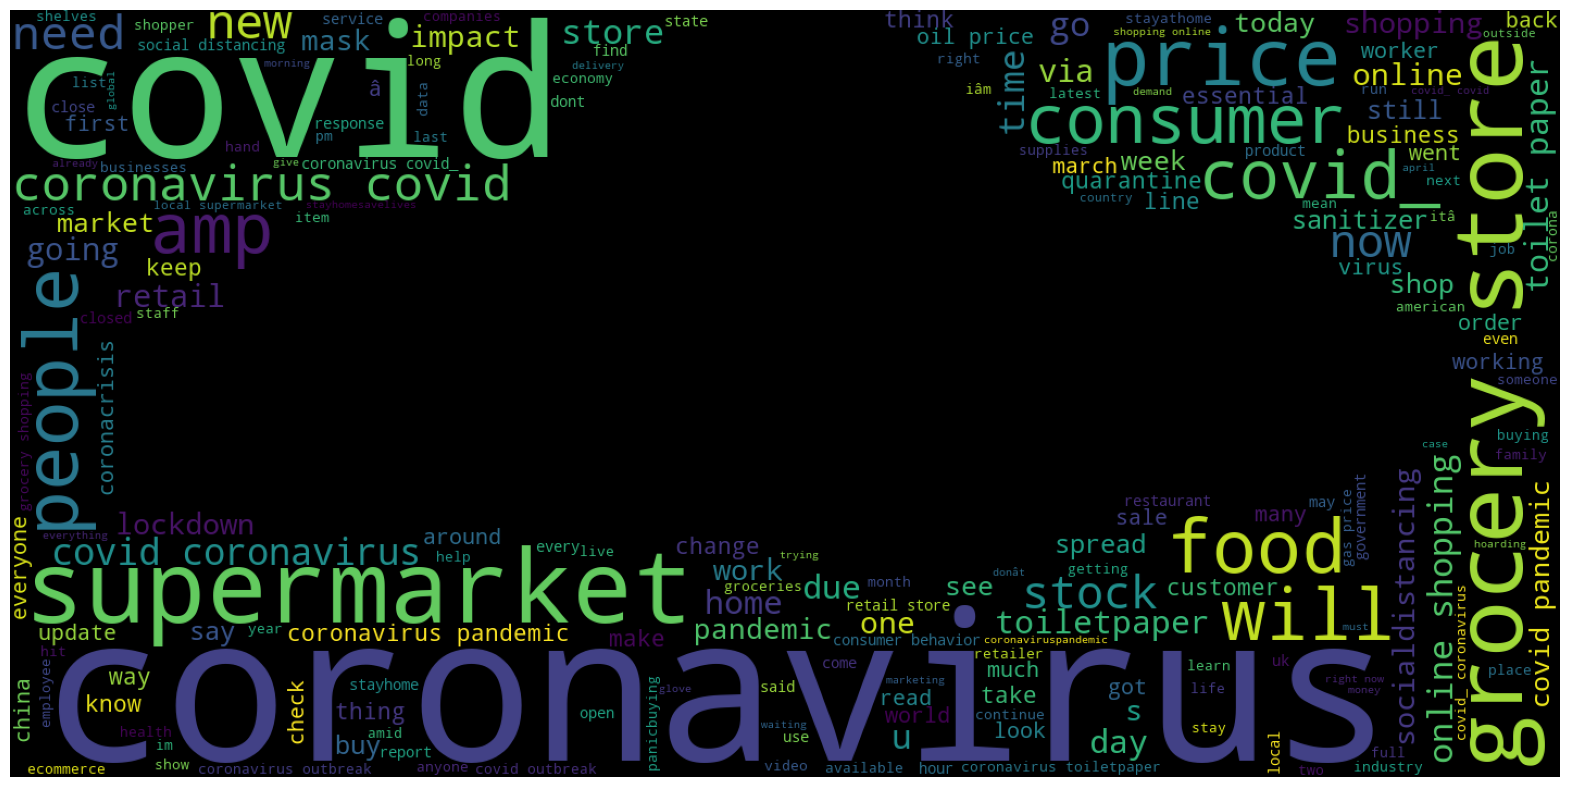

In [37]:
wc(df[df["Sentiment"]==1]["OriginalTweet"],'black')

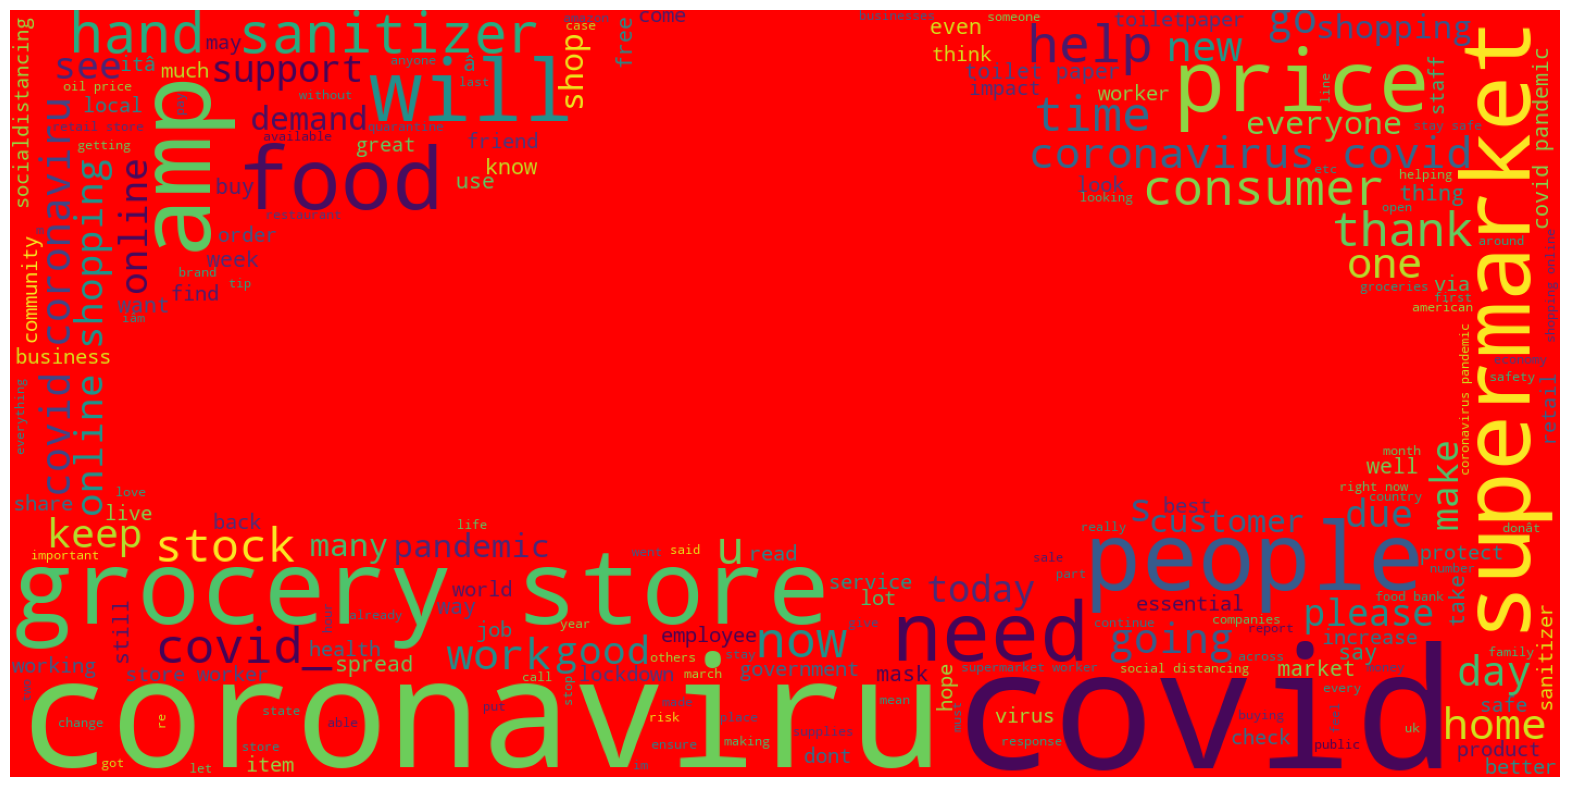

In [36]:
wc(df[df["Sentiment"]==2]["OriginalTweet"],'red')